In [1]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
from matplotlib import pylab as plt

# Data exploration

In [2]:
item = pd.read_csv('data/item.csv', delimiter= '|', encoding = "ISO-8859-1", low_memory=False)
user = pd.read_csv('data/user.csv', delimiter= '|', low_memory=False)
train = pd.read_csv('data/train.csv', delimiter= '\t', low_memory=False)
test = pd.read_csv('data/test.csv', delimiter= ',', low_memory=False)

In [ ]:
display(train.head(10))
display(test.head(10))
display(user.head())
display(item.head())

In [ ]:
display(DataFrameSummary(train).summary())
display(DataFrameSummary(test).summary())
display(DataFrameSummary(user).summary())
display(DataFrameSummary(item).summary())

In [3]:
def get_missing_columns(df):
    return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])

table_names = ['item', 'user', 'train', 'test']
dfs = item, user, train, test 
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

item ['release date', 'video release date', 'IMDb URL']
user []
train []
test []


# Data preprocessing

In [4]:
# Replace the release date of the film with NaN value with the mean of all films release dates
item['release date'] = pd.to_datetime(item['release date'])
display(item[item['release date'].isna() == 1])
item.loc[item['release date'].isna() == 1, 'release date'] = pd.to_datetime(int(item['release date'].astype(np.int64).mean())).date()
display(item[item['movieId'] == 267])

# Remove unknow film with NaN release date
#item.drop(item[item['release date'].isna() == 1].index, inplace = True)

#Create Year, Month and Day columns 
item['release date'] = pd.to_datetime(item['release date'])
item['releaseYear'] = item['release date'].dt.year
item['releaseMonth'] = item['release date'].dt.month
item['releaseDay'] = item['release date'].dt.day

# Remove "video release date" column that has empty data
item.drop(columns=['video release date'], inplace=True)
# item.drop(columns=['video release date','IMDb URL'], inplace=True)

,movieId,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,movieId,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,1989-05-09,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
display(DataFrameSummary(item).summary())

C:\Users\marco\AppData\Local\Temp\ipykernel_14832\1036657937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(item).summary())


,movieId,movieTitle,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,releaseYear,releaseMonth,releaseDay
count,1682.0,NaN,NaN,NaN,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,...,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0
mean,841.5,NaN,NaN,NaN,0.001189,0.149227,0.080262,0.02497,0.072533,0.300238,...,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052,1989.38585,2.671225,6.213436
std,485.695893,NaN,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,...,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714,14.249343,3.01367,8.793296
min,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922.0,1.0,1.0
25%,421.25,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993.0,1.0,1.0
50%,841.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0,1.0,1.0
75%,1261.75,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0,3.0,9.75
max,1682.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1998.0,12.0,31.0
counts,1682,1682,1682,1679,1682,1682,1682,1682,1682,1682,...,1682,1682,1682,1682,1682,1682,1682,1682,1682,1682
uniques,1682,1664,241,1660,2,2,2,2,2,2,...,2,2,2,2,2,2,2,71,12,31


In [6]:
# Convert seconds timestamp to datetime and create rate Year, Month, Day and Hour columns 
# train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')
# train['ratingYear'] = train['timestamp'].dt.year
# train['ratingMonth'] = train['timestamp'].dt.month
# train['ratingDay'] = train['timestamp'].dt.day
# train['ratingHour'] = train['timestamp'].dt.hour

#Scale the rating from (1-5) to (0-4) to match the test dataset
#train['rating'] = train['rating'] - 1
#rating2Idx = {o:i for i,o in enumerate(range(5,0,-1))}
#train.rating = train.rating.apply(lambda x: rating2Idx[x])
test['rating'] = test['rating'] + 1

# Remove timestamp column
train.drop(columns=['timestamp'], inplace=True)

train = pd.concat([train, test.drop(columns=['Id'])], ignore_index=True)

In [7]:
#Rename user ID column to match item table column name
user.rename(columns={"user id": "userId"},inplace=True)
user.rename(columns={"zip code": "zipCode"},inplace=True)

#Rename Children's ID column to remove the ' character
item.rename(columns={"Children\'s": "Childrens"},inplace=True)

## Merge user and item info into train and test tables

In [8]:
#Merge item and user data into train table
train_data = pd.merge(train, item, on="movieId")
train_data = pd.merge(train_data, user, on="userId")
#train_data = train
display(DataFrameSummary(train_data).summary())

#Merge item and user data into test table
test_data = pd.merge(test, item, on="movieId")
test_data = pd.merge(test_data, user, on="userId")
#test_data = test
display(DataFrameSummary(test_data).summary())

#Separate labels from features
train_labels = np.array(train_data['rating'])
train_data.drop(columns=['rating'], inplace=True)

test_labels = np.array(test_data['rating'])
test_data.drop(columns=['rating'], inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_14832\4086964098.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(train_data).summary())


,userId,movieId,rating,movieTitle,release date,IMDb URL,unknown,Action,Adventure,Animation,...,Thriller,War,Western,releaseYear,releaseMonth,releaseDay,age,gender,occupation,zipCode
count,100000.0,100000.0,100000.0,NaN,NaN,NaN,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,NaN,NaN,NaN
mean,462.48475,425.53013,3.42225,NaN,NaN,NaN,0.0001,0.25589,0.13753,0.03605,...,0.21872,0.09398,0.01854,1987.95631,2.64368,5.73125,32.96985,NaN,NaN,NaN
std,266.61442,330.798356,1.203225,NaN,NaN,NaN,0.01,0.436362,0.344408,0.186416,...,0.41338,0.291802,0.134894,14.154889,3.123561,8.374595,11.562623,NaN,NaN,NaN
min,1.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1922.0,1.0,1.0,7.0,NaN,NaN,NaN
25%,254.0,175.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1986.0,1.0,1.0,24.0,NaN,NaN,NaN
50%,447.0,322.0,4.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1994.0,1.0,1.0,30.0,NaN,NaN,NaN
75%,682.0,631.0,4.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1996.0,3.0,8.0,40.0,NaN,NaN,NaN
max,943.0,1682.0,5.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1998.0,12.0,31.0,73.0,NaN,NaN,NaN
counts,100000,100000,100000,100000,100000,99987,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
uniques,943,1682,5,1664,241,1660,2,2,2,2,...,2,2,2,71,12,31,61,2,21,795


C:\Users\marco\AppData\Local\Temp\ipykernel_14832\4086964098.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(DataFrameSummary(test_data).summary())


,Id,userId,movieId,rating,movieTitle,release date,IMDb URL,unknown,Action,Adventure,...,Thriller,War,Western,releaseYear,releaseMonth,releaseDay,age,gender,occupation,zipCode
count,20000.0,20000.0,20000.0,20000.0,NaN,NaN,NaN,20000.0,20000.0,20000.0,...,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,NaN,NaN,NaN
mean,9999.5,211.76095,424.82985,2.99785,NaN,NaN,NaN,0.00035,0.25115,0.1311,...,0.2217,0.08925,0.0187,1987.92135,2.62235,5.67995,33.5419,NaN,NaN,NaN
std,5773.647028,121.6469,328.452907,1.417373,NaN,NaN,NaN,0.018705,0.433685,0.337518,...,0.415401,0.285111,0.135467,14.099408,3.112879,8.363332,11.457849,NaN,NaN,NaN
min,0.0,1.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1922.0,1.0,1.0,7.0,NaN,NaN,NaN
25%,4999.75,99.0,174.0,2.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1986.0,1.0,1.0,25.0,NaN,NaN,NaN
50%,9999.5,222.0,322.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,1994.0,1.0,1.0,31.0,NaN,NaN,NaN
75%,14999.25,308.0,633.0,4.0,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,1996.0,3.0,8.0,41.0,NaN,NaN,NaN
max,19999.0,462.0,1591.0,5.0,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1998.0,12.0,31.0,68.0,NaN,NaN,NaN
counts,20000,20000,20000,20000,20000,20000,19994,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
uniques,20000,459,1410,5,1401,224,1400,2,2,2,...,2,2,2,70,12,31,56,2,21,416


In [9]:
# check for missing data in columns
table_names = ['train_data', 'test_data']
dfs = train_data, test_data
for i, df in enumerate(dfs):
    print(table_names[i], get_missing_columns(df))

C:\Users\marco\AppData\Local\Temp\ipykernel_14832\1084376430.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])


train_data ['IMDb URL']


C:\Users\marco\AppData\Local\Temp\ipykernel_14832\1084376430.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  return list(df.columns[df.describe(include = 'all').loc['count']<len(df)])


test_data ['IMDb URL']


# Definición del modelo

In [10]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dropout, Concatenate, Dense, Activation, Lambda
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
m_unique = np.unique(np.concatenate((train_data.movieId.unique(), test_data.movieId.unique())))
movie2Idx = {o:i+1 for i,o in enumerate(m_unique)}

age2Idx = {o:i+1 for i,o in enumerate(train_data.age.unique())}

gender2Idx = {o:i+1 for i,o in enumerate(train_data.gender.unique())}

occupation2Idx = {o:i+1 for i,o in enumerate(train_data.occupation.unique())}

zipCode2Idx = {o:i+1 for i,o in enumerate(train_data.zipCode.unique())}

train_data.movieId = train_data.movieId.apply(lambda x: movie2Idx[x])
test_data.movieId = test_data.movieId.apply(lambda x: movie2Idx[x])

train_data.age = train_data.age.apply(lambda x: age2Idx[x])
test_data.age = test_data.age.apply(lambda x: age2Idx[x])

train_data.gender = train_data.gender.apply(lambda x: gender2Idx[x])
test_data.gender = test_data.gender.apply(lambda x: gender2Idx[x])

train_data.occupation = train_data.occupation.apply(lambda x: occupation2Idx[x])
test_data.occupation = test_data.occupation.apply(lambda x: occupation2Idx[x])

train_data.zipCode = train_data.zipCode.apply(lambda x: zipCode2Idx[x])
test_data.zipCode = test_data.zipCode.apply(lambda x: zipCode2Idx[x])

n_users = int(train_data.userId.nunique())
n_movies = len(m_unique)
n_age = int(train_data.age.nunique())
n_gender = int(train_data.gender.nunique())
n_occupation = int(train_data.occupation.nunique())
n_zipCode = int(train_data.zipCode.nunique())

#### Separo datos en train y validation

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size = 0.2, random_state=344) #, stratify=list(train_data['userId']) )

### Definicion de DNN

In [70]:
n_latent_factors_userId = 5 #10
n_latent_factors_movieId = 5 #10
n_latent_factors_age = 5
n_latent_factors_occupation = 5
n_latent_factors_gender = 1

userId_input = Input(shape=(1,), name="userId_input") 
userId_embedding = Embedding(n_users + 1, n_latent_factors_userId, name='userId_embedding', embeddings_regularizer = l2(0.001))(userId_input)
userId_vec = Flatten(name='userId_flatten')(userId_embedding)

movieId_input = Input(shape=(1,), name="movieId_input") 
movieId_embedding = Embedding(n_movies + 1, n_latent_factors_movieId, name='movieId_embedding', embeddings_regularizer = l2(0.001))(movieId_input)
movieId_vec = Flatten(name='movieId_flatten')(movieId_embedding)

age_input = Input(shape=(1,), name="age_input") 
age_embedding = Embedding(n_age + 1, n_latent_factors_age, name='age_embedding')(age_input)
age_vec = Flatten(name='age_flatten')(age_embedding)

occupation_input = Input(shape=(1,), name="occupation_input") 
occupation_embedding = Embedding(n_occupation + 1, n_latent_factors_occupation, name='occupation_embedding')(occupation_input)
occupation_vec = Flatten(name='occupation_flatten')(occupation_embedding)

gender_input = Input(shape=(1,), name="gender_input") 
gender_embedding = Embedding(n_gender + 1, n_latent_factors_gender, name='gender_embedding')(gender_input)
gender_vec = Flatten(name='gender_flatten')(gender_embedding)

filmT_input = []
filmT_embedding = []
filmT_vec = []
for i,k in enumerate(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']):
    filmT_input.append(Input(shape=(1,), name=k+"_input"))
    #filmT_embedding.append(Embedding(2 + 1, n_latent_factors_gender, name=k+'_embedding')(filmT_input[i]))
    #filmT_vec.append(Flatten(name=k+'_flatten')(filmT_embedding[i]))
    filmT_vec.append(Flatten(name=k+'_flatten')(filmT_input[i]))

concat = Concatenate(name='Concat')([userId_vec, movieId_vec])#, age_vec, occupation_vec, gender_vec]+filmT_vec)

x1 = Dense(100,name='Dense1', activation='relu')(concat)
#x2 = Dense(50,name='Dense2', activation='relu')(x1)

#x = Dense(1, name='Output')(x1)
x = Dense(1, activation='sigmoid',name='rating')(x1)
max_rating = 5
min_rating = 1
x = Lambda(lambda z: (max_rating - min_rating) * z + min_rating)(x)

model = Model([userId_input, movieId_input], x)#, age_input, occupation_input, gender_input]+filmT_input, x)
model.summary()
model.save_weights('initial_weights.tf')

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 userId_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 movieId_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 userId_embedding (Embedding)   (None, 1, 5)         4720        ['userId_input[0][0]']           
                                                                                                  
 movieId_embedding (Embedding)  (None, 1, 5)         8415        ['movieId_input[0][0]']          
                                                                                            

In [71]:
lr = 0.001 #0.001
model.compile(optimizer=Adam(learning_rate=lr), metrics=['mse', RootMeanSquaredError()], loss='mse')
checkpoint = ModelCheckpoint(filepath='bestmodel.tf', monitor='val_loss', verbose=1, save_best_only=True)

In [72]:
epochs = 30 #20
batch_size = 512

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

history = model.fit([x_train.userId, x_train.movieId], y_train, #, x_train.age, x_train.occupation, x_train.gender, x_train.unknown, x_train.Action, x_train.Adventure, x_train.Animation, x_train.Childrens, x_train.Comedy, x_train.Crime, x_train.Documentary, x_train.Drama, x_train.Fantasy, x_train['Film-Noir'], x_train.Horror, x_train.Musical, x_train.Mystery, x_train.Romance, x_train['Sci-Fi'], x_train.Thriller, x_train.War, x_train.Western], y_train, 
                    validation_data=([x_valid.userId, x_valid.movieId], y_valid), #,, x_valid.age, x_valid.occupation, x_valid.gender, x_valid.unknown, x_valid.Action, x_valid.Adventure, x_valid.Animation, x_valid.Childrens, x_valid.Comedy, x_valid.Crime, x_valid.Documentary, x_valid.Drama, x_valid.Fantasy, x_valid['Film-Noir'], x_valid.Horror, x_valid.Musical, x_valid.Mystery, x_valid.Romance, x_valid['Sci-Fi'], x_valid.Thriller, x_valid.War, x_valid.Western], y_valid),  
                    epochs=epochs, batch_size=batch_size, 
                    callbacks=[checkpoint], verbose=2)

Epoch 1/30

Epoch 1: val_loss improved from inf to 1.23083, saving model to bestmodel.tf
INFO:tensorflow:Assets written to: bestmodel.tf\assets


INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 5s - loss: 1.3915 - mse: 1.3841 - root_mean_squared_error: 1.1765 - val_loss: 1.2308 - val_mse: 1.2200 - val_root_mean_squared_error: 1.1045 - 5s/epoch - 32ms/step
Epoch 2/30

Epoch 2: val_loss improved from 1.23083 to 1.20981, saving model to bestmodel.tf
INFO:tensorflow:Assets written to: bestmodel.tf\assets


INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 3s - loss: 1.2221 - mse: 1.2095 - root_mean_squared_error: 1.0998 - val_loss: 1.2098 - val_mse: 1.1960 - val_root_mean_squared_error: 1.0936 - 3s/epoch - 22ms/step
Epoch 3/30

Epoch 3: val_loss improved from 1.20981 to 1.20879, saving model to bestmodel.tf
INFO:tensorflow:Assets written to: bestmodel.tf\assets


INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 3s - loss: 1.2030 - mse: 1.1883 - root_mean_squared_error: 1.0901 - val_loss: 1.2088 - val_mse: 1.1936 - val_root_mean_squared_error: 1.0925 - 3s/epoch - 20ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 1.20879
157/157 - 1s - loss: 1.1974 - mse: 1.1817 - root_mean_squared_error: 1.0871 - val_loss: 1.2106 - val_mse: 1.1948 - val_root_mean_squared_error: 1.0931 - 638ms/epoch - 4ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 1.20879
157/157 - 1s - loss: 1.1953 - mse: 1.1791 - root_mean_squared_error: 1.0859 - val_loss: 1.2092 - val_mse: 1.1928 - val_root_mean_squared_error: 1.0922 - 635ms/epoch - 4ms/step
Epoch 6/30

Epoch 6: val_loss did not improve from 1.20879
157/157 - 1s - loss: 1.1919 - mse: 1.1754 - root_mean_squared_error: 1.0842 - val_loss: 1.2105 - val_mse: 1.1939 - val_root_mean_squared_error: 1.0927 - 604ms/epoch - 4ms/step
Epoch 7/30

Epoch 7: val_loss improved from 1.20879 to 1.20602, saving model to bestmodel.tf
INFO:tensorflow:Assets writt

INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 3s - loss: 1.1883 - mse: 1.1716 - root_mean_squared_error: 1.0824 - val_loss: 1.2060 - val_mse: 1.1894 - val_root_mean_squared_error: 1.0906 - 3s/epoch - 22ms/step
Epoch 8/30

Epoch 8: val_loss improved from 1.20602 to 1.20014, saving model to bestmodel.tf
INFO:tensorflow:Assets written to: bestmodel.tf\assets


INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 4s - loss: 1.1815 - mse: 1.1645 - root_mean_squared_error: 1.0791 - val_loss: 1.2001 - val_mse: 1.1830 - val_root_mean_squared_error: 1.0877 - 4s/epoch - 25ms/step
Epoch 9/30

Epoch 9: val_loss improved from 1.20014 to 1.19745, saving model to bestmodel.tf
INFO:tensorflow:Assets written to: bestmodel.tf\assets


INFO:tensorflow:Assets written to: bestmodel.tf\assets


157/157 - 4s - loss: 1.1734 - mse: 1.1559 - root_mean_squared_error: 1.0751 - val_loss: 1.1975 - val_mse: 1.1798 - val_root_mean_squared_error: 1.0862 - 4s/epoch - 23ms/step
Epoch 10/30

Epoch 10: val_loss did not improve from 1.19745
157/157 - 1s - loss: 1.1685 - mse: 1.1505 - root_mean_squared_error: 1.0726 - val_loss: 1.2012 - val_mse: 1.1830 - val_root_mean_squared_error: 1.0877 - 595ms/epoch - 4ms/step
Epoch 11/30

Epoch 11: val_loss did not improve from 1.19745
157/157 - 1s - loss: 1.1650 - mse: 1.1465 - root_mean_squared_error: 1.0708 - val_loss: 1.2014 - val_mse: 1.1829 - val_root_mean_squared_error: 1.0876 - 610ms/epoch - 4ms/step
Epoch 12/30

Epoch 12: val_loss did not improve from 1.19745
157/157 - 1s - loss: 1.1625 - mse: 1.1438 - root_mean_squared_error: 1.0695 - val_loss: 1.2013 - val_mse: 1.1826 - val_root_mean_squared_error: 1.0875 - 596ms/epoch - 4ms/step
Epoch 13/30

Epoch 13: val_loss did not improve from 1.19745
157/157 - 1s - loss: 1.1601 - mse: 1.1412 - root_mean_

In [73]:
model.load_weights('bestmodel.tf')

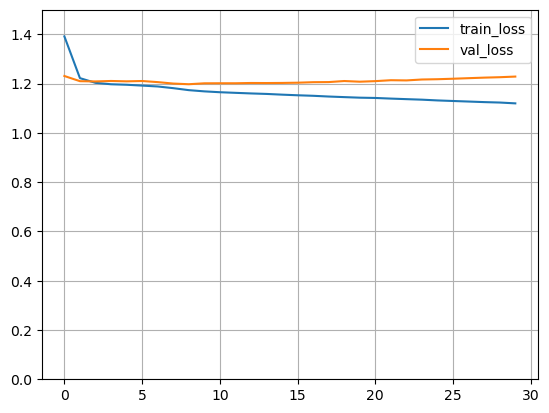

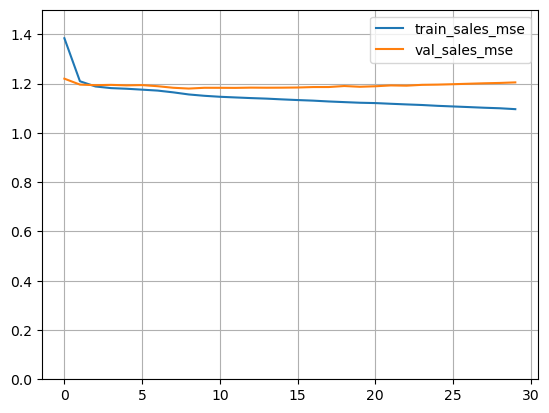

In [74]:
plt.figure()

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.ylim([0,1.5])
plt.grid()

plt.figure()
plt.plot(history.history['mse'],label='train_sales_mse')
plt.plot(history.history['val_mse'],label='val_sales_mse')
plt.legend()
plt.ylim([0,1.5])
plt.grid()

plt.show()

In [75]:
model.evaluate([x_valid.userId, x_valid.movieId], y_valid) #, x_valid.age, x_valid.occupation, x_valid.gender, x_valid.unknown, x_valid.Action, x_valid.Adventure, x_valid.Animation, x_valid.Childrens, x_valid.Comedy, x_valid.Crime, x_valid.Documentary, x_valid.Drama, x_valid.Fantasy, x_valid['Film-Noir'], x_valid.Horror, x_valid.Musical, x_valid.Mystery, x_valid.Romance, x_valid['Sci-Fi'], x_valid.Thriller, x_valid.War, x_valid.Western], y_valid)

625/625 [==============================] - 2s 3ms/step - loss: 1.1975 - mse: 1.1798 - root_mean_squared_error: 1.0862


[1.1974515914916992, 1.1798421144485474, 1.0862053632736206]

In [76]:
model.evaluate([test_data.userId, test_data.movieId], test_labels) #, test_data.age, test_data.occupation, test_data.gender, test_data.unknown, test_data.Action, test_data.Adventure, test_data.Animation, test_data.Childrens, test_data.Comedy, test_data.Crime, test_data.Documentary, test_data.Drama, test_data.Fantasy, test_data['Film-Noir'], test_data.Horror, test_data.Musical, test_data.Mystery, test_data.Romance, test_data['Sci-Fi'], test_data.Thriller, test_data.War, test_data.Western], test_labels)

625/625 [==============================] - 2s 3ms/step - loss: 2.2302 - mse: 2.2126 - root_mean_squared_error: 1.4875


[2.230226516723633, 2.2126173973083496, 1.4874869585037231]

In [77]:
test_predictions = model.predict([test_data.userId, test_data.movieId]) #, test_data.age, test_data.occupation, test_data.gender, test_data.unknown, test_data.Action, test_data.Adventure, test_data.Animation, test_data.Childrens, test_data.Comedy, test_data.Crime, test_data.Documentary, test_data.Drama, test_data.Fantasy, test_data['Film-Noir'], test_data.Horror, test_data.Musical, test_data.Mystery, test_data.Romance, test_data['Sci-Fi'], test_data.Thriller, test_data.War, test_data.Western]) #*y_max

625/625 [==============================] - 2s 2ms/step


In [78]:
submit_df = pd.DataFrame(test_predictions, columns =['rating'])
#submit_df.rating = submit_df.rating.apply(lambda x: round(x))
submit_df.index.names = ['Id']
submit_df.to_csv(f'submision_only_user_film_embed5_sigmoid_100neur.csv', index=True)

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

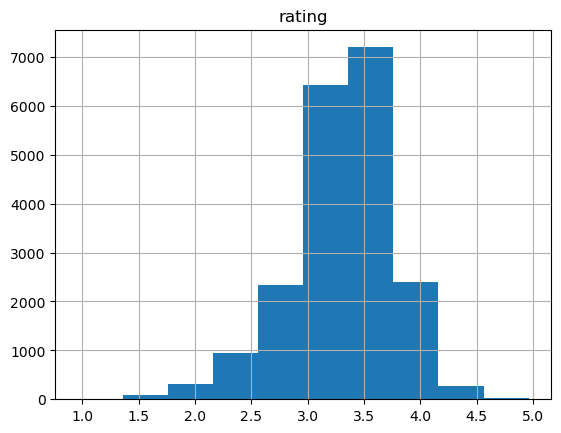

In [35]:
submit_df.hist()

In [ ]:
cat_vars = ['userId', 'movieId', #'ratingYear', 'ratingMonth', 'ratingDay', 'ratingHour',
            'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
            'releaseYear', 'releaseMonth', 'releaseDay', 
            'age', 'gender', 'occupation', 'zipCode']
print(len(cat_vars))

for cat_var in cat_vars:
    train_data[cat_var] = train_data[cat_var].astype(str)
    #if cat_var not in ['ratingYear', 'ratingMonth', 'ratingDay', 'ratingHour']:
    test_data[cat_var] = test_data[cat_var].astype(str)

In [ ]:
# contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC']
# print(len(contin_vars))

#Dimensiones de los embeddings
# cat_var_dict = {'userId': 10, 'movieId': 10, 'ratingYear': 2, 'ratingMonth': 3, 'ratingDay': 5, 'ratingHour': 3,
#             'unknown': 1, 'Action': 1, 'Adventure': 1, 'Animation': 1, 'Childrens': 1, 'Comedy': 1,
#             'Crime': 1, 'Documentary': 1, 'Drama': 1, 'Fantasy': 1, 'Film-Noir': 1, 'Horror': 1,
#             'Musical': 1, 'Mystery': 1, 'Romance': 1, 'Sci-Fi': 1, 'Thriller': 1, 'War': 1, 'Western': 1,
#             'releaseYear': 5, 'releaseMonth': 5, 'releaseDay': 5, 
#             'age': 5, 'gender': 1, 'occupation': 4, 'zipCode': 5}

cat_var_dict = {'userId': 20, 'movieId': 20, 'ratingYear': 2, 'ratingMonth': 3, 'ratingDay': 5, 'ratingHour': 3,
            'unknown': 1, 'Action': 1, 'Adventure': 1, 'Animation': 1, 'Childrens': 1, 'Comedy': 1,
            'Crime': 1, 'Documentary': 1, 'Drama': 1, 'Fantasy': 1, 'Film-Noir': 1, 'Horror': 1,
            'Musical': 1, 'Mystery': 1, 'Romance': 1, 'Sci-Fi': 1, 'Thriller': 1, 'War': 1, 'Western': 1,
            'releaseYear': 10, 'releaseMonth': 5, 'releaseDay': 5, 
            'age': 8, 'gender': 1, 'occupation': 10, 'zipCode': 3}

print(len(cat_var_dict))

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout, Lambda, TextVectorization
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras import backend as K

#from tensorflow.lookup import KeyValueTensorInitializer, StaticVocabularyTable

In [ ]:
def get_cat_vars_model(cat_vars, uniques, uniques_dict, cat_var_dict):
    import tensorflow
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        
        #table_init = KeyValueTensorInitializer(uniques_dict[cat_var], np.int64(uniques[cat_var][0]))
        #table = StaticVocabularyTable(table_init, 1)
        
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input", dtype=tensorflow.string) 
        #cat_var_in_table = Lambda(lambda cats: table.lookup(cats))(cat_var_in)           
        cat_var_inputs.append(cat_var_in)
        
        vectorize_layer = TextVectorization(max_tokens=uniques[cat_var][0]+1, output_mode='int',output_sequence_length=1)        
        vectorize_layer.adapt(uniques_dict[cat_var])
        cat_var_in_table = vectorize_layer(cat_var_in)
        
        embed_out = Embedding(uniques[cat_var][0]+1, cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in_table)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [ ]:
uniques = DataFrameSummary(train_data[cat_vars]).summary().loc[['uniques']]
display(uniques.T)

uniques_dict = {col_name: pd.unique(train_data[col_name]) for col_name in train_data.columns}

#### Defino las features a utilizar

In [ ]:
# cat_vars = ['userId', 'movieId', 'ratingYear', 'ratingMonth', 'ratingDay', 
#             'releaseYear', 'releaseMonth', 'releaseDay', 'age', 'gender', 'occupation', 'zipCode',
#             'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
#             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
#             'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#cat_vars = ['userId', 'movieId', 'age']
            # 'releaseYear', 'age', 'gender', 'occupation',
            # 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
            # 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
            # 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
            
cat_vars = ['userId', 'movieId', 
            # 'releaseYear', 'age', 'gender', 'occupation',
            # 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
            # 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
            # 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
           ]
            
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, uniques_dict, cat_var_dict)



#train_data['age'] = train_data['age'].astype(np.int64)# / train_data['age'].astype(float).mean()

contin_vars = [ ]
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

#train_data['age'].describe()

In [ ]:
first_hidden_units = 500 #200
second_hidden_units = 400 #50
#third_hidden_units = 50
l2_lambda = 0 #1e-4 #0.1e-3
output_activation = 'linear'

merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
#x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = LeakyReLU()(x)
#x = Dense(third_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
#x = LeakyReLU()(x)

output_1 = Dense(1, name='Rating', activation=output_activation)(x)

model = Model(cat_var_inputs + cont_vars_inputs, [output_1])
model.summary()
model.save_weights('initial_weights.tf')

#### Separo datos en train y validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_labels, test_size = 0.1, random_state=44) #, stratify=list(train_data['userId']) )

# Baseline: rating medio por pelicula

In [ ]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(x_train[all_vars].values, len(all_vars))
X_val = np.hsplit(x_valid[all_vars].values, len(all_vars))
X_test = np.hsplit(test_data[all_vars].values, len(all_vars))
#X_full = np.hsplit(train_data[all_vars].values, len(all_vars))

In [ ]:
#normalization
# y_max = max(y_train)
# y_train = y_train/y_max
# y_valid = y_valid/y_max
# test_labels = test_labels/y_max

In [ ]:
lr = 0.001
model.compile(optimizer=Adam(learning_rate=lr), metrics=['mse', RootMeanSquaredError()], loss='mse')
checkpoint = ModelCheckpoint('bestmodel.tf', monitor='val_loss', verbose=1, save_best_only=True)


In [ ]:
epochs = 6 #20
batch_size = 512

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

history = model.fit(X_train, y_train, validation_data=(X_val, y_valid),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

In [ ]:
model.load_weights('bestmodel.tf')

In [ ]:
plt.figure()

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['mse'],label='train_sales_mse')
plt.plot(history.history['val_mse'],label='val_sales_mse')
plt.legend()
plt.grid()

plt.show()

In [ ]:
model.evaluate(X_test, test_labels)

In [ ]:
test_predictions = model.predict(X_test) #*y_max

In [ ]:
submit_df = pd.DataFrame(test_predictions, columns =['Rating'])
submit_df.index.names = ['Id']
submit_df.to_csv(f'submision_1.csv', index=True)

In [ ]:
#item['release date'] = item['release date'].apply(lambda x: x.split('-')[0]+'-'+months_dict[x.split('-')[1]]+'-'+x.split('-')[2])


import numpy as np
display(item[item['release date'].isna() == 1])
print(item['release date'].astype(int).mean())
display(item[item['movieId'] == 267])
item.loc[item['release date'].isna() == 1, 'release date'] = pd.to_datetime(int(item['release date'].astype(int).mean())).dt.date
#display(item.head())
#display(item[item['movieId'] == 267])

In [ ]:
display(item[item['release date'].isna() == 1])

display(item[item['movieId'] == 267])
display(item[item['movieId'] == 268])


In [ ]:
display(pd.to_datetime(train[train['movieId'] == 267]['timestamp'], unit='s'))
display(test[test['movieId'] == 267])

In [ ]:
# Remove the remaining genre unknow film
display(item[item['unknown'] == 1])
# item.drop(item[item['unknown'] == 1].index, inplace = True)


